In [1]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *
import GPy
import scipy.stats

import matplotlib.pyplot as plt
np.random.seed(101)

from sklearn.decomposition import TruncatedSVD

### Importing the Tracer Data to Select the Optimisation set S

In [2]:
parameters['i_end'] = 988
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


### Working subset of the data : set S

In [4]:
S = working_subset(data_df, loc_df, nbins = (25,25,25), threshold_sum = 10**-2 )

The remaining number of points is :  57725


### Import the Field of interest for computing the optimisation : TracerBackground / Pressure

In [13]:
parameters['i_end'] = 988
parameters['field_name'] = "Tracer"
parameters


{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [14]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


In [15]:
X = loc_df.values[S,:] #[I,:dim]
Z = data_df.values[S,:].sum(axis=1)#[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Z.shape

(57725,)

### Detrending Data : 
Plotting the data along each direction in order to see if there is a obvious trend. It seams that it is not the case. 

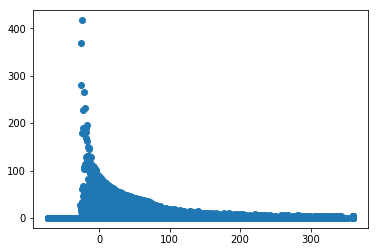

In [20]:
plt.scatter(X[:,0],Z)
#plt.scatter(X[:,1],Z)
#plt.scatter(X[:,2],Z)

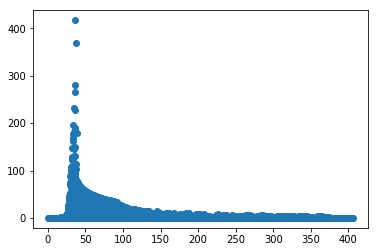

In [21]:
plt.scatter(np.linalg.norm(X,axis=1),Z)


### Normality of the Data : 

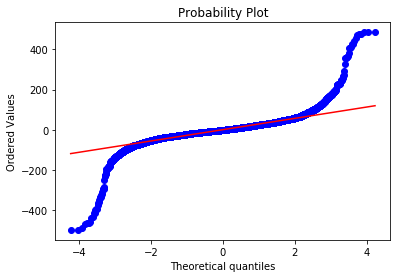

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
scipy.stats.probplot(Z-np.mean(Z),plot=ax)
plt.show()

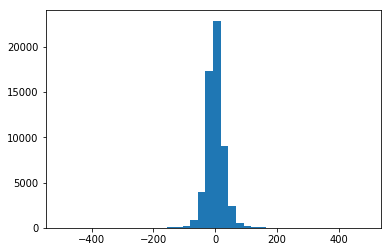

In [71]:
plt.hist(Z-np.mean(Z),bins=40);